### 重写规则

Mathematica 的第二原理说：计算即重写。<br/>
重写规则的一般形式是：（模式）（重写符号）（重写结果）<br/>
其中重写符号有四种：$->、:>、=、:=$，分别叫做规则、延迟规则、赋值、延迟赋值。后两者需要手工移除它们（=.、Clear、Remove）

In [1]:
(* 最常见的规则出现在 Solve 类函数的返回值中： *)
result = Solve[x^3 - 3 x + 2 == 0, x]
(* Solve 的结果是不唯一的,因此可以按需生成规则应用 *)
Expand[x^4 + x^2 + 1 /. result[[1]]]
Expand[x^4 + x^2 + 1 /. result]
(* 获得到由不同规则带来的结果构成的表 *)

{{x -> -2}, {x -> 1}, {x -> 1}}
21
{21, 3, 3}

规则比赋值要灵活,并产生模块化的机制。<br/>
规则的左边可以是模式：

In [5]:
rule = (f[x_] -> x^2);
f[5] + g[2] /. rule

25 + g[2]

In [7]:
x = 1;
rule = f[x_] :> x^2;
x = 3;
f[5] + g[2] /. rule

25 + g[2]

In [11]:
rule

2
f[x_] :> x

规则和延迟规则（以及赋值和延迟赋值）的区别在于：延迟规则指向的表达式,是一个程序的入口，之后每次应用这条规则,都要被计算;
当规则不止一条时，我们把所有规则组成一个表，然后应用它。

In [12]:
(a^b)^c //. {(x_^y_)^z_ :> x^(y z), a -> 2, b -> 3, c -> 4}

4096

匹配到规则表中的某个规则之后，这个规则将会被应用一次，它之后的规则将会被忽略。<br/>
$//.$:用来反复匹配、应用，直到找不出可进一步化简的模式

In [13]:
rule = {Log[x_ y_] :> Log[x] + Log[y]};

Log[a b c d] /. rule
Log[a b c d] /. rule /. rule
Log[a b c d] //. rule
FixedPoint[# /. rule &, Log[a b c d]]

Log[a] + Log[b c d]
Log[a] + Log[b] + Log[c d]
Log[a] + Log[b] + Log[c] + Log[d]
Log[a] + Log[b] + Log[c] + Log[d]

$eg.$利用未知函数所满足的微分方程化简微分多项式：

$eg2.$保序合并 （Union） 运算

In [19]:
myUnion[ex_] := 
  ex //. h_[x1___, y_, x2___, y_, x3___] :> h[x1, y, x2, x3];

list = {3, 2, 1, a, c, 1, b, 2, a, 4}
myUnion[list]
Union[list]

{3, 2, 1, a, c, 1, b, 2, a, 4}
{3, 2, 1, a, c, b, 4}
{1, 2, 3, 4, a, b, c}

运算符$/.和//.$的全名分别是$ ReplaceAll 和 ReplaceRepeated$，它们的一个共同点是它们会对它们左边表达式的每个子表达式进行匹配和替换。有的时候我们希望控制这种搜索的深度，这时候就需要用$ Replace $这个函数。

In [8]:
Replace[x^2, x^2 -> a^2]
Replace[x^2, x -> a]
Replace[x^2, x -> a, 2]

2
a
 2
x
 2
a

$Replace$ 只返回第一个匹配成功的重写结果，有时候我们希望考察所有可能的重写结果，这时候可以用$ ReplaceList $这个函数。

In [11]:
Replace[a + b + c, x_ + y_ :> f[x, y]]
ReplaceList[a + b + c, x_ + y_ :> f[x, y]]

f[a, b + c]
{f[a, b + c], f[b, a + c], f[c, a + b], f[a + b, c], f[a + c, b], f[b + c, a]}

In [13]:
(* 例：生成从 1 到 n 的乘法表 *)
times[x_, y_] := 
  ToString[x] <> "\[Times]" <> ToString[y] <> "=" <> ToString[x y];
timesTable[n_] := 
  times @@@ Sort[ReplaceList[Range[n], {{___, x_, ___} :> {x, x},
      {___, x_, ___, y_, ___} :> {x, y}}]];
timesTable[19]

{1×1=1, 1×2=2, 1×3=3, 1×4=4, 1×5=5, 1×6=6, 1×7=7, 1×8=8, 1×9=9, 1×10=10, 1×11=11, 
 
>   1×12=12, 1×13=13, 1×14=14, 1×15=15, 1×16=16, 1×17=17, 1×18=18, 1×19=19, 2×2=4, 
 
>   2×3=6, 2×4=8, 2×5=10, 2×6=12, 2×7=14, 2×8=16, 2×9=18, 2×10=20, 2×11=22, 2×12=24, 
 
>   2×13=26, 2×14=28, 2×15=30, 2×16=32, 2×17=34, 2×18=36, 2×19=38, 3×3=9, 3×4=12, 
 
>   3×5=15, 3×6=18, 3×7=21, 3×8=24, 3×9=27, 3×10=30, 3×11=33, 3×12=36, 3×13=39, 3×14=42, 
 
>   3×15=45, 3×16=48, 3×17=51, 3×18=54, 3×19=57, 4×4=16, 4×5=20, 4×6=24, 4×7=28, 4×8=32, 
 
>   4×9=36, 4×10=40, 4×11=44, 4×12=48, 4×13=52, 4×14=56, 4×15=60, 4×16=64, 4×17=68, 
 
>   4×18=72, 4×19=76, 5×5=25, 5×6=30, 5×7=35, 5×8=40, 5×9=45, 5×10=50, 5×11=55, 5×12=60, 
 
>   5×13=65, 5×14=70, 5×15=75, 5×16=80, 5×17=85, 5×18=90, 5×19=95, 6×6=36, 6×7=42, 
 
>   6×8=48, 6×9=54, 6×10=60, 6×11=66, 6×12=72, 6×13=78, 6×14=84, 6×15=90, 6×16=96, 
 
>   6×17=102, 6×18=108, 6×19=114, 7×7=49, 7×8=56, 7×9=63, 7×10=70, 7×11=77, 7×12=84, 
 
>   7×13=91, 7×14=98, 7×15=105, 7×16=112, 7×17=119, 7×18=126, 7×19=133, 8×8=64, 8×9=72, 
 
>   8×10=80, 8×11=88, 8×12=96, 8×13=104, 8×14=112, 8×15=120, 8×16=128, 8×17=136, 
 
>   8×18=144, 8×19=152, 9×9=81, 9×10=90, 9×11=99, 9×12=108, 9×13=117, 9×14=126, 
 
>   9×15=135, 9×16=144, 9×17=153, 9×18=162, 9×19=171, 10×10=100, 10×11=110, 10×12=120, 
 
>   10×13=130, 10×14=140, 10×15=150, 10×16=160, 10×17=170, 10×18=180, 10×19=190, 
 
>   11×11=121, 11×12=132, 11×13=143, 11×14=154, 11×15=165, 11×16=176, 11×17=187, 
 
>   11×18=198, 11×19=209, 12×12=144, 12×13=156, 12×14=168, 12×15=180, 12×16=192, 
 
>   12×17=204, 12×18=216, 12×19=228, 13×13=169, 13×14=182, 13×15=195, 13×16=208, 
 
>   13×17=221, 13×18=234, 13×19=247, 14×14=196, 14×15=210, 14×16=224, 14×17=238, 
 
>   14×18=252, 14×19=266, 15×15=225, 15×16=240, 15×17=255, 15×18=270, 15×19=285, 
 
>   16×16=256, 16×17=272, 16×18=288, 16×19=304, 17×17=289, 17×18=306, 17×19=323, 
 
>   18×18=324, 18×19=342, 19×19=361}

不安全的重写--赋值（$Set$）<br/>
赋值与规则很大的一点不同是：赋值操作所定义的重写法则总是从属于某个符号的，而规则是独立存在的。

In [33]:
x = 1;
?x

In [35]:
f[x_] := x^2;
f[x_, y_] := x y;
?f

如果我们想取消之前赋的值，可以用 =. 运算符。<br/>运算符 =. 每次清掉一条赋值，如果想清空所有赋值，可以用 Clear 函数：

In [17]:
Clear[f]

Clear 的作用是清掉规则，之后这个符号还存在于系统中，还占用着内存。如果想完全移除这个变量，将它占用的内存释放掉，则应该用 Remove：

In [18]:
Remove[f]

(* 赋值行为可以是以其它形式出现的 *)<br/>
i -= di<br/>
x *= c<br/>
x = y = value<br/>
{x, y} = {value1, value2}<br/>
{x, y} = {y, x}

In [28]:
(* 有一些函数可以改变其参数的值： *)
list = {a, b, c};
AppendTo[list, d]
PrependTo[list, z]
(* AppendTo 和 PrependTo 这两个函数是比较慢的。对于比较长的表，尽量不要反复用它们。 *)

{a, b, c, d}
{z, a, b, c, d}

在 Mathematica 中，比起用表存储数组更好的做法是把数组视为从自然数集到其它集合的函数：

In [33]:
a[1] = 1;
a[n_] := n/2 /; EvenQ[n];
Array[a, 10]

{1, 1, a[3], 2, a[5], 3, a[7], 4, a[9], 5}

这样做的好处是，函数对象不需要初始化，也不需要指定尺寸。

In [48]:
b = {x, y, z}
b[[1]] == x

{value2, value1, z}
True

另外，函数的自变量可以是任何东西，所以可以实现一些更有趣的结构。

22.8571 kg
----------
     2
    m
22.8571 kg
----------
     2
    m
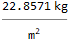
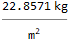

In [50]:
张三[身高] = 1.75 m;
张三[体重] = 70 kg;
谁_[BMI] ^:= 谁[体重]/谁[身高]^2;
张三[BMI]
(* 这种写法实际上体现了一种面向对象编程的想法，下面是另一种更花哨的写法： *)
张三 /: 张三.身高 = 1.75 m;
张三 /: 张三.体重 = 70 kg;
BMI /: (谁_).BMI := (谁.体重)/(谁.身高)^2
张三.BMI

这里新出现的两个运算符 ^:= 和 /:<br/>
同时值得一提的是mma拥有极好的量纲系统与字符串计算能力

赋值和规则另一个重大的不同是：多次赋值产出的规则表是按照从特殊到一般的顺序来应用的，而与它们出现的先后无关；规则表则不同，应用顺序等于它们在表中的排列顺序。

In [59]:
f[1] = 1;
f[n_] := n + 1;
{f[1], f[2]}

g[n_] := n + 1;
g[1] = 1;
{g[1], g[2]}

{h[1], h[2]} /. {h[1] -> 1, h[n_] :> n + 1}
{h[1], h[2]} /. {h[n_] :> n + 1, h[1] -> 1}
?f
?g

{1, 3}
{1, 3}
{1, 3}
{2, 3}

如果要使用很长的规则表 ${p1->r1, p2->r2, ......}$，最好用 Mathematica 的内部函数 Dispatch 压缩一下，这样可以提高替换的效率。

In [69]:
rules = Table[x[i] -> RandomInteger[{1, i}], {i, 10000}];
dispatch = Dispatch[rules];

Timing[Table[x[i] /. rules, {i, 10000}];]
Timing[Table[x[i] /. dispatch, {i, 10000}];]

{2.89063, Null}
{0., Null}

Dispatch[<5>]
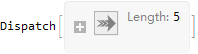

In [73]:
rules = {a -> b, b -> c, c -> a, d -> e, e -> d};
dispatch = Dispatch[rules]

In [75]:
FullForm[dispatch]

Dispatch[List[Rule[a, List[value2, value1, z]], Rule[List[value2, value1, z], c], 
 
>    Rule[c, a], Rule[d, e], Rule[e, d]]]

Mathematica 中同时赋值、延迟赋值和全局规则等原理可以帮助我们实现一种非常优雅的递归机制。

In [ ]:
f[0] = 1;
f[1] = 1;
f[n_] := f[n - 1] + f[n - 2];

Timing[f[50]]

In [ ]:
g[0] = 1;
g[1] = 1;
g[n_] := g[n] = g[n - 1] + g[n - 2];

$RecursionLimit = Infinity;
Timing[g[50]]



因为多了一个同时赋值，所以之前计算过的值都被自动储存下来了，这对于递归函数来说非常的重要，因为可以减少大量的重复计算。

对于赋值语句：$F[X_1,X_2,...,X_n]=value$<br/>
Mathematica 默认这样一条规则应当从属于符号$F$。<br/>
另一种情况是：

In [ ]:
log[x_] + log[y_] := log[x y]

尽管我们可以通过解除保护的方法强行对函数 Plus 增加一条规则，但这不是正确的做法。因为这样做的后果是，系统每次进行加法运算时都不得不检查待计算的表达式是否符合我们增加的这条规则，这是极大的资源浪费。<br/>
对于这两种情况，我们都需要一种机制，来指定规则所从属的对象。

In [ ]:
log[x_] + log[y_] ^:= log[x y]

一般来说，运算符 ^:= 会将这条规则指定给下层的所有函数，此时赋值号右边的值叫做这些函数的 upvalue。

In [ ]:
f[g[x_], h[y_]] ^:= x^2 + Sin[y];

如果我们想更明确地指派规则，可以用：

In [ ]:
g /: f[g[x_], h[y_]] := x^2 + Sin[y];

但是要注意的是，这种规则指派只能改动一层。

In [ ]:
g /: f[h[g[x_]]] := x + 1;